In [1]:
# First read the csv file containing the wrangled data
import pandas as pd
df=pd.read_csv('file_before_melt.csv')
# Remove the population column
df = df.iloc[:,:-1]
df.head()

,state,county,rural_urban_continuum_code,less_than_high_school_percentage_adults_only,high_school_diploma_percentage_adults_only,some_college_or_associate_degree_percentage,bachelors_or_higher_percentage,poverty_percentage
0,AL,Autauga County,2.0,12.417,34.331,28.660,24.593,14.0
1,AL,Baldwin County,3.0,9.972,28.692,31.788,29.547,12.0
2,AL,Barbour County,6.0,26.236,34.927,25.969,12.868,30.0
3,AL,Bibb County,1.0,19.302,41.816,26.883,12.000,20.0
4,AL,Blount County,1.0,19.969,32.942,34.039,13.050,14.0


In [2]:
# Add two new columns to the DataFrame which show the percentage of people with diploma degree or lower and percentage of people
# with some degree more than diploma.
df_extended = df.copy()
df_extended['high_school_diploma_or_less']=df_extended.iloc[:,3]+df_extended.iloc[:,4]
df_extended['more_than_high_school_diploma']=df_extended.iloc[:,5]+df_extended.iloc[:,6]
df_temp = df_extended.iloc[:,[0,1,-3,-2,-1]]
df_temp.head()

,state,county,poverty_percentage,high_school_diploma_or_less,more_than_high_school_diploma
0,AL,Autauga County,14.0,46.748,53.253
1,AL,Baldwin County,12.0,38.664,61.335
2,AL,Barbour County,30.0,61.163,38.837
3,AL,Bibb County,20.0,61.118,38.883
4,AL,Blount County,14.0,52.911,47.089


In [3]:
# Create a new data frame by melting the new data frame (with two education level) based on education level
new_df1 = pd.melt(df_temp,id_vars=['state','county','poverty_percentage'],var_name='education_level',value_name='education_percentage')
new_df1.head()

,state,county,poverty_percentage,education_level,education_percentage
0,AL,Autauga County,14.0,high_school_diploma_or_less,46.748
1,AL,Baldwin County,12.0,high_school_diploma_or_less,38.664
2,AL,Barbour County,30.0,high_school_diploma_or_less,61.163
3,AL,Bibb County,20.0,high_school_diploma_or_less,61.118
4,AL,Blount County,14.0,high_school_diploma_or_less,52.911


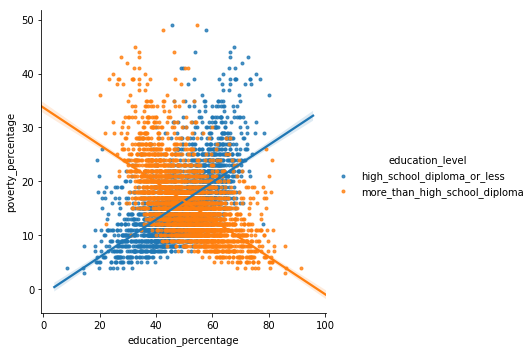

In [4]:
# The first plot shows how the poverty percentage varies based on the two education level
import matplotlib.pyplot as plt
import seaborn as sns
plt.close()
sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df1,markers='.')
plt.show()

## Conclusion 1: Education reduces poverty level

In [5]:
# Then melt the extended dataframe (with more educational levels) on the education level
df_temp = df_extended.iloc[:,[0,1,3,8,9,6,7]]
df_temp = df_temp.rename(columns={'less_than_high_school_percentage_adults_only':'less_than_high_school_diploma',
                                 'bachelors_or_higher_percentage':'bachelors_or_higher'})
new_df2 = pd.melt(df_temp, id_vars=['state','county','poverty_percentage'],
                  var_name='education_level',value_name='education_percentage')
new_df2.head()

,state,county,poverty_percentage,education_level,education_percentage
0,AL,Autauga County,14.0,less_than_high_school_diploma,12.417
1,AL,Baldwin County,12.0,less_than_high_school_diploma,9.972
2,AL,Barbour County,30.0,less_than_high_school_diploma,26.236
3,AL,Bibb County,20.0,less_than_high_school_diploma,19.302
4,AL,Blount County,14.0,less_than_high_school_diploma,19.969


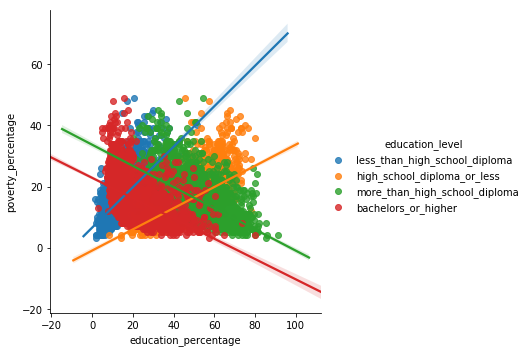

In [6]:
# The second plot shows more specificly the relationship between poverty and 
# a) less than high school
# b) Diploma orr less than high school
# c) More than diploma (either associate, some college degree, bachelors, or higher degrees)
# d) Specifically Bachelors degree or higher

sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df2)
plt.show()

###### The figure above shows that the rate of change in poverty is close between any degree more than diploma and bachelors degree.
#### Conclusion 2-1: If our goal is to reduce the poverty by educating people with diploma degree, it would not make significant difference if they gain some associate/college degree or bachelors/higher degree

###### In addition, the figure shows the rate of change in poverty with respect to the people with high school diploma or lower is slower compared to the the rate of poverty for people without the diploma.
#### Conclusion 2-2: Having a high school diploma helps reducing the poverty

## Conclusion 2: Gaining high school diploma or some associate/college degree improves the poverty the most

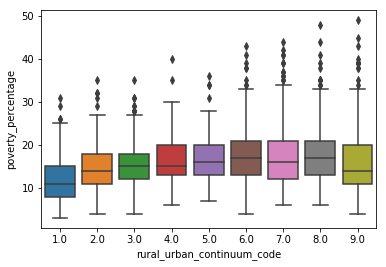

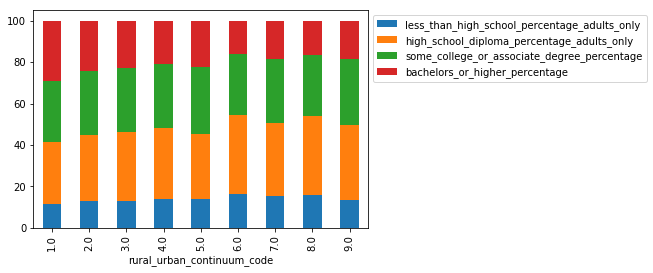

In [55]:
plt.close()
sns.boxplot(x='rural_urban_continuum_code',y='poverty_percentage',data=df)
plt.show()
new_df3 = df.groupby('rural_urban_continuum_code').mean()
new_df3.iloc[:,:-1].plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

###### Two figures above show that except rural_urban_continuum_codes (RUCC) 1 and 9, the rest are close to each other in both education and poverty level. 
## Conclusion 3: RUCC has little affect on education and poverty